# Rolling a Twenty-Sided Die

Suppose we want to know whether a certain twenty-sided die tends to roll 1's more often. We roll the die 100 times and observe that we rolled a 1 a total of 9 times. We want to use a hypothesis test to determine whether this is unusually high if the dice were fair.

Let's starting by stating the hypotheses. 

**Null hypothesis:** The probability of rolling a 1 is 1/20 = 0.05.

**Alternative hypothesis:** The probability of rolling a 1 is greater than 0.05.

In [1]:
# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [20]:
observed_value = 0.09

First, we create our die.

In [5]:
die = np.arange(1, 21)
die

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

We do one trial of the simulation.

In [11]:
nrolls = 100
rolls = np.random.choice(die, nrolls)
total_ones = np.count_nonzero(rolls == 1)
prop_ones = total_ones / nrolls
prop_ones

0.05

We put this into a function so that we can simulate what would happen if we were to roll a fair die 100 times.

In [12]:
def roll_simulation(n):
    die = np.arange(1, 21)
    rolls = np.random.choice(die, nrolls)
    total_ones = np.count_nonzero(rolls == 1)
    prop_ones = total_ones / n
    return prop_ones

In [15]:
roll_simulation(100)

0.04

We do the simulation 1000 times within a loop and store the results inside `sim_props`.

In [25]:
nsimulations = 1000
nrolls = 100
sim_props = make_array()

for i in np.arange(nsimulations):
    sim_props = np.append(sim_props, roll_simulation(nrolls))

We can graph the output to visualize it with the observed value.

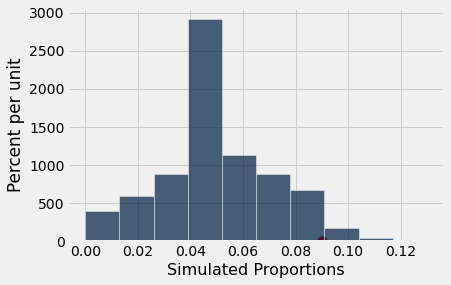

In [26]:
Table().with_column('Simulated Proportions', sim_props).hist()
plt.scatter(observed_value, 0, color='red', s = 100)

Finally, we can find the p-value.

In [27]:
np.count_nonzero(sim_props >= observed_value) / nsimulations

0.057